In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train,x_test,y_test, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)
        samples_test=len(x_test)
        Error=np.zeros(epochs)
        Error_test=np.zeros(epochs)
        # training loop
        for i in range(epochs):
            err = 0
            err_test=0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
                output_test = x_test[j]
                for layer in self.layers:
                  output_test = layer.forward_propagation(output_test)
                err_test += self.loss(y_test[j], output_test)
                #result.append(output)
            # calculate average error on all samples
            err /= samples
            err_test/=samples_test
            Error[i]=err
            Error_test[i]=err_test
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))
        return Error,Error_test  

In [9]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [10]:
import numpy as np

# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [11]:
# inherit from base class Layer
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    # returns the activated input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    # Returns input_error=dE/dX for a given output_error=dE/dY.
    # learning_rate is not used because there is no "learnable" parameters.
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [12]:
# loss function and its derivative
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return np.exp(-x) / (1 + np.exp(-x))**2

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(x, 0)

def relu_prime(x):
    return np.array(x >= 0).astype('int')

In [13]:
#Creating Data
X=np.linspace(-2*np.pi,2*np.pi,10**4).reshape((10**4,1)) # X coordinate
Y=np.linspace(-2*np.pi,2*np.pi,10**4).reshape((10**4,1)) #y coordinate
np.random.shuffle(X) #Shuffling X
np.random.shuffle(Y) #Shuffling y
F=np.sin(X+Y)
Data=np.hstack((X,Y,F))#(X,y) coordinates with actual values
X_train,y_train=Data[:,:2],Data[:,2].reshape((10000,1))#Train splite(X , y in [-2*pi,2*pi])
X_test=np.hstack((np.linspace(0,2*np.pi,10**4).reshape((10**4,1)),np.zeros((10**4,1))))#Test Splite (y=0 for all samples , X in [0,2*pi])
y_test=np.sin(X_test[:,0]+X_test[:,1])#Creating Sin(x)

In [14]:
nepochs=30
net = Network()
net.add(FCLayer(2, 25))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(25, 25))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(25, 1))
net.add(ActivationLayer(tanh, tanh_prime))
net.use(mse, mse_prime)
Error,Error_test=net.fit(X_train.reshape((10000,1,2)), y_train.reshape((10000,1,1)),X_test,y_test, epochs=nepochs, learning_rate=0.03)

# test
out = net.predict(X_train)
print(out)

epoch 1/30   error=0.346453
epoch 2/30   error=0.200324
epoch 3/30   error=0.171213
epoch 4/30   error=0.189706
epoch 5/30   error=0.151191
epoch 6/30   error=0.120729
epoch 7/30   error=0.108113
epoch 8/30   error=0.093681
epoch 9/30   error=0.091962
epoch 10/30   error=0.076088
epoch 11/30   error=0.063265
epoch 12/30   error=0.055639
epoch 13/30   error=0.045728
epoch 14/30   error=0.038769
epoch 15/30   error=0.028806
epoch 16/30   error=0.025436
epoch 17/30   error=0.022037
epoch 18/30   error=0.022301
epoch 19/30   error=0.016374
epoch 20/30   error=0.017210
epoch 21/30   error=0.016493
epoch 22/30   error=0.011624
epoch 23/30   error=0.011405
epoch 24/30   error=0.010838
epoch 25/30   error=0.009842
epoch 26/30   error=0.007912
epoch 27/30   error=0.007446
epoch 28/30   error=0.006547
epoch 29/30   error=0.005926
epoch 30/30   error=0.005385
[array([[0.96467224]]), array([[0.65979225]]), array([[-0.89924431]]), array([[-0.98956755]]), array([[0.93905846]]), array([[-0.05163475]]

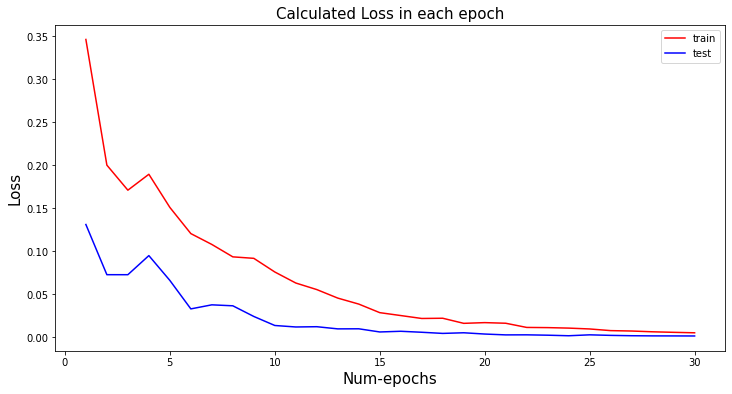

In [15]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(1,nepochs+1),Error,color='r',label='train')
plt.plot(np.arange(1,nepochs+1),Error_test,color='b',label='test')
plt.xlabel('Num-epochs',size=15)
plt.ylabel('Loss',size=15)
plt.title("Calculated Loss in each epoch",size=15)
plt.legend();

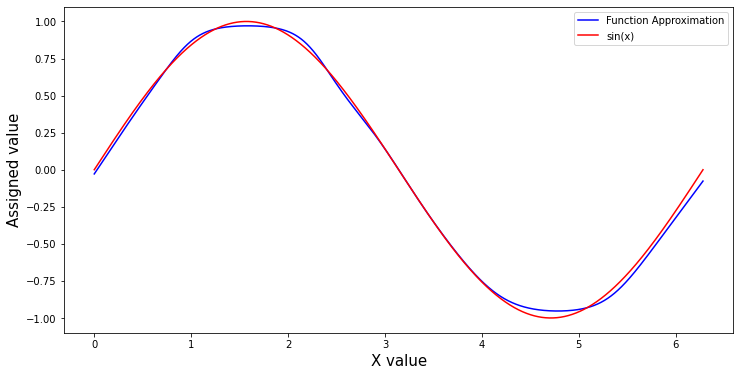

In [16]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(0,2*np.pi,10**4).reshape((10**4,1)),np.array(net.predict(X_test)).reshape((10000,1)),color='b',label='Function Approximation')
plt.plot(np.linspace(0,2*np.pi,10**4).reshape((10**4,1)),y_test,color='r',label='sin(x)')
plt.xlabel('X value',size=15)
plt.ylabel('Assigned value',size=15)
plt.legend();